# <center> **TUGAS 2 KECERDASAN KOMPUTASIONAL** </center>
# <center> K-Means dan Hierarchical Clustering </center>
Anggota Kelompok:
- Vania Meilani Taqiyyah (05111840000045)
- Michael Ricky (05111840000078)
- Mochamad Fattah Ibnu Azmi (5998201002)

# **Uraian Masalah**

Tahapan yang dilakukan:
1. Download dataset di UCI Machine Learning Repository dengan link berikut https://archive.ics.uci.edu/ml/datasets/Ultrasonic+flowmeter+diagnostics pilih salah satu dataset saja.
2. Lakukan Clustering menggunakan metode k-Means dan Hierarchical Clustering (single, complete, average, ward).
3. Lakukan analisis hasil menggunakan metode evaluasi clustering SSE atau Silhouette Score.
4. File yang dikumpulkan bisa berupa file jupiter notebook

# **Penyelesaian**

1. Download dataset flowmeter, edit datset menjadi file csv dengan Microsoft 
Excel.

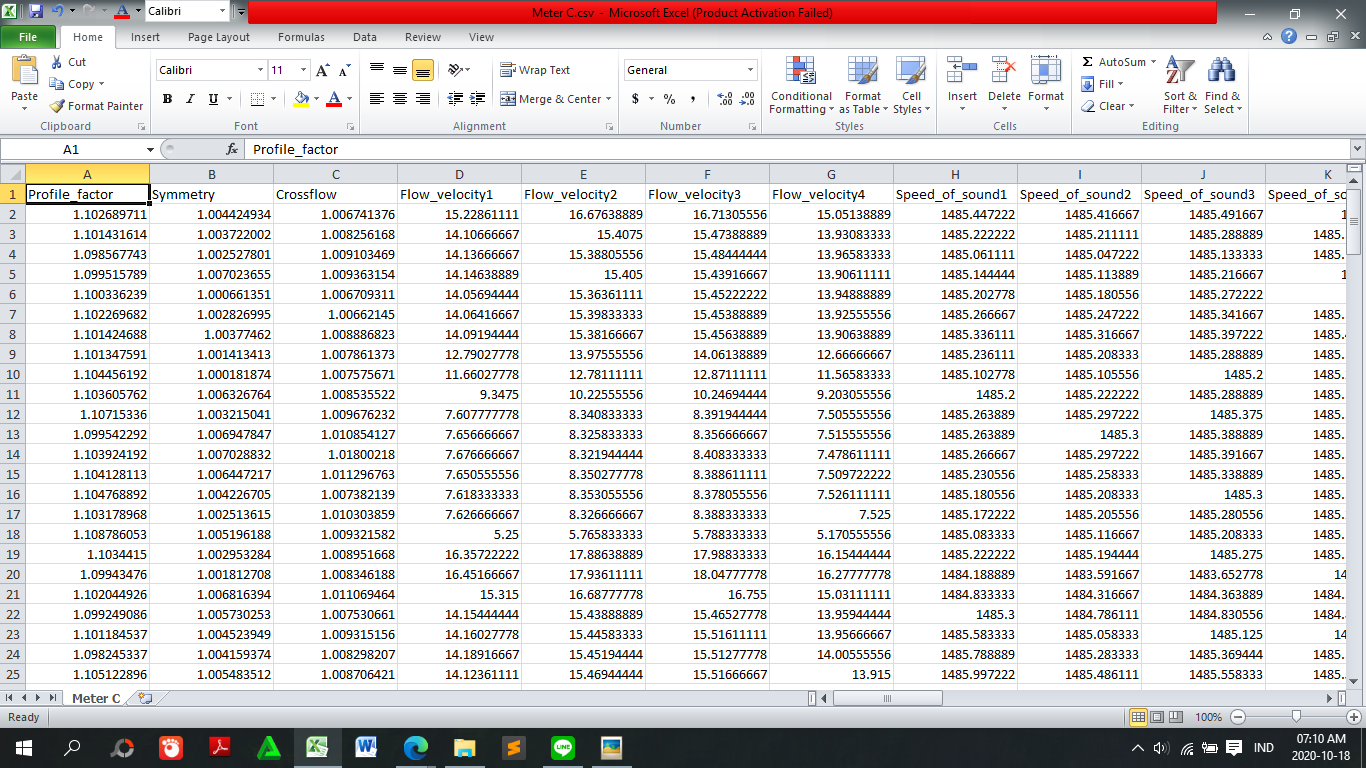

2. Upload dataset csv ke dalam Google Drive agar dapat diakses secara online. Pastikan lokasi penyimpanan dataset karena akan digunakan dalam pengkodean clustering pada python.

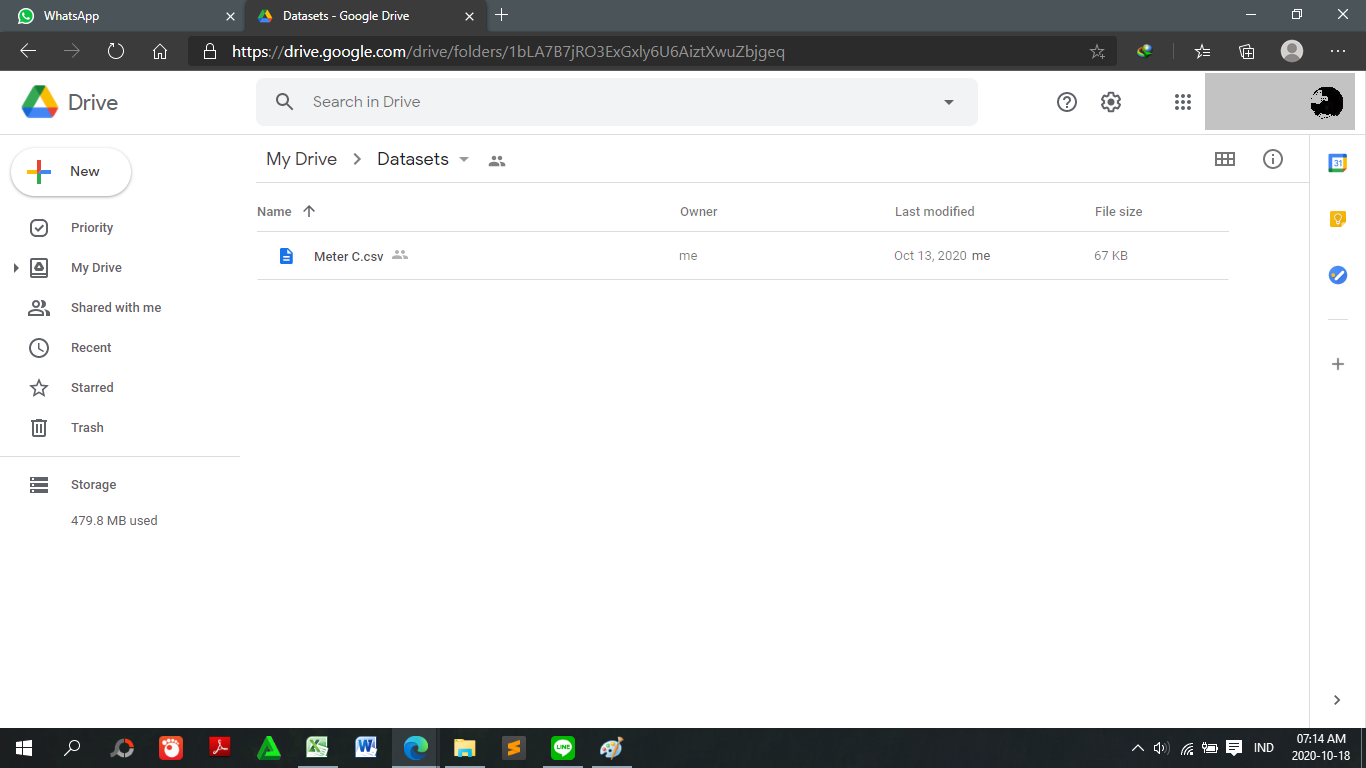

3. Selanjutnya akan dilakukan pengkodean clustering pada python. Berikut adalan kode dan penjelasannya.

In [ ]:
#Masukkan modul yang dibutuhkan
import numpy as np                                    #modul numpy digunakan untuk data number
import pandas as pd                                   #modul pandas digunakan untuk data array
import matplotlib.pyplot as plt                       #modul matplotlib.pyplot digunakan untuk membuat plot
from sklearn.cluster import KMeans                    #modul KMeans digunakan untuk KMeans clustering
from sklearn.cluster import AgglomerativeClustering   #modul AgglomeratveClustering digunakan untuk Hierarchical clustering
from sklearn.metrics import silhouette_score          #modul silhouette_score digunakan untuk analisis hasil clustering


from google.colab import drive
drive.mount('/content/drive')                         #melakukan mount drive agar mendapatkan akses ke Google Drive. Akan diperlukan kode akses saat dijalankan                        

data_path = r'drive/My Drive/Datasets/Meter C.csv'    #WARNING: pastikan lokasi penyimpanan dataset sesuai
X = pd.read_csv(data_path)                            #membaca dataset csv
X                                                     #menampilkan dataset csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Profile_factor,Symmetry,Crossflow,Flow_velocity1,Flow_velocity2,Flow_velocity3,Flow_velocity4,Speed_of_sound1,Speed_of_sound2,Speed_of_sound3,Speed_of_sound4,Signal_strength1a,Signal_strength1b,Signal_strength2a,Signal_strength2b,Signal_strength3a,Signal_strength3b,Signal_strength4a,Signal_strength4b,Signal_quality1a,Signal_quality1b,Signal_quality2a,Signal_quality2b,Signal_quality3a,Signal_quality3b,Signal_quality4a,Signal_quality4b,Gain1a,Gain1b,Gain2a,Gain2b,Gain3a,Gain3b,Gain4a,Gain4b,Transit_time1a,Transit_time1b,Transit_time2a,Transit_time2b,Transit_time3a,Transit_time3b,Transit_time4a,Transit_time4b,Class
0,1.102690,1.004425,1.006741,15.228611,16.676389,16.713056,15.051389,1485.447222,1485.416667,1485.491667,1485.550000,62.000000,62.000000,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,3444.805556,2924.555556,3232.111111,3193.138889,3098.250000,3328.611111,3524.611111,2507.583333,15.538889,15.538889,10.000000,10.000000,17.200000,17.200000,17.700000,17.700000,86.585833,85.576667,106.985000,105.530833,106.714444,105.255833,86.461111,85.460833,1
1,1.101432,1.003722,1.008256,14.106667,15.407500,15.473889,13.930833,1485.222222,1485.211111,1485.288889,1485.352778,62.000000,62.000000,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,3536.222222,2981.194444,3260.333333,3254.972222,3118.666667,3335.611111,3553.666667,2601.277778,15.500000,15.500000,10.000000,10.000000,17.200000,17.200000,17.700000,17.700000,86.560000,85.628056,106.942500,105.603611,106.676111,105.326667,86.433889,85.510556,1
2,1.098568,1.002528,1.009103,14.136667,15.388056,15.484444,13.965833,1485.061111,1485.047222,1485.133333,1485.183333,62.000000,62.000000,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,3513.527778,3005.000000,3284.833333,3264.194444,3138.027778,3329.472222,3567.888889,2592.750000,15.500000,15.500000,10.000000,10.000000,17.200000,17.200000,17.700000,17.700000,86.572222,85.635278,106.954722,105.614722,106.686389,105.336389,86.444722,85.519167,1
3,1.099516,1.007024,1.009363,14.146389,15.405000,15.439167,13.906111,1485.144444,1485.113889,1485.216667,1485.250000,62.000000,62.000000,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,3541.472222,2990.722222,3282.916667,3275.472222,3123.500000,3334.250000,3573.916667,2607.194444,15.500000,15.500000,10.000000,10.000000,17.200000,17.200000,17.700000,17.700000,86.566111,85.630833,106.952500,105.609444,106.681389,105.331667,86.439722,85.515833,1
4,1.100336,1.000661,1.006709,14.056944,15.363611,15.452222,13.948889,1485.202778,1485.180556,1485.272222,1485.300000,62.000000,62.000000,63.000000,63.000000,61.000000,61.000000,61.000000,61.000000,3495.333333,2970.333333,3289.888889,3244.194444,3117.277778,3332.083333,3540.222222,2592.666667,15.500000,15.500000,10.000000,10.000000,17.200000,17.200000,17.700000,17.700000,86.561111,85.630833,106.946667,105.603889,106.676111,105.328889,86.436944,85.512222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.426944,2675.100000,0.000000,1353.600000,1484.400000,58.277778,60.111111,63.166667,64.138889,56.388889,56.361111,61.000000,61.000000,0.000000,0.000000,0.000000,0.000000,1402.000000,1537.000000,3658.138889,2548.416667,46.516667,46.516667,46.186111,45.680556,46.858333,47.858333,18.205556,18.205556,48.530000,47.070000,0.000000,0.000000,115.220000,117.400000,86.504167,85.547500,4
177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.500278,2675.100000,0.000000,1353.600000,1484.444444,60.166667,61.055556,54.527778,54.472222,58.000000,57.972222,61.000000,61.000000,0.000000,0.000000,0.000000,0.000000,1402.000000,1537.000000,3629.944444,2587.138889,43.608333,43.608333,47.247222,47.997222,48.005556,47.302778,18.200000,18.200000,48.530000,47.070000,0.000000,0.000000,115.220000,117.400000,86.504722,85.543333,4
178,0.000000,0.000000,0.00

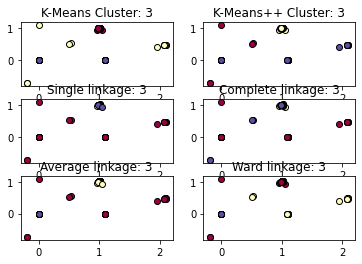

Silhouette_score k-Means : 0.7424500512178129
Silhouette_score k-Means++: 0.7361633780560071
Silhouette_score Single linkage : 0.6959330480196286
Silhouette_score Complete linkage : 0.7266608801979577
Silhouette_score Average linkage : 0.6993618628045318
Silhouette_score Ward linkage : 0.6993618628045318


In [ ]:
k = 3                                                                                       #deklarasi jumlah cluster yang diinginkan

#fungsi fungsi clustering=======================================================

kmeans = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=3).fit(X)               #fungsi perhitungan kMeans clustering

kmeans_plus = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=3).fit(X)       #fungsi perhitungan kMeans clustering ++

agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters= k).fit(X)           #fungsi perhitungan Hierarchical clustering (complete)

agglo_single = AgglomerativeClustering(linkage='single',n_clusters= k).fit(X)               #fungsi perhitungan Hierarchical clustering (single)

agglo_avg = AgglomerativeClustering(linkage='average',n_clusters= k).fit(X)                 #fungsi perhitungan Hierarchical clustering (average)

agglo_ward = AgglomerativeClustering(linkage='ward',n_clusters= k).fit(X)                   #fungsi perhitungan Hierarchical clustering (ward)

#Permodelan=====================================================================

plt.subplot(3, 2, 1)                                                                        #menampilkan plot untuk kMeans clustering

unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):                                                   #prosedur kMeans clustering

    kmeans_labels = (kmeans.labels_ == k)

    xy = X[kmeans_labels]
    plt.plot(xy['Symmetry'], xy['Crossflow'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means Cluster: %d' % kmeans.n_clusters)

plt.subplot(3, 2, 2)                                                                        #menampilkan plot untuk kMeans clustering ++

unique_labels = set(kmeans_plus.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):                                                   #prosedur kMeans clustering ++

    kmeansplus_labels = (kmeans_plus.labels_ == k)

    xy = X[kmeansplus_labels]
    plt.plot(xy['Symmetry'], xy['Crossflow'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means++ Cluster: %d' % kmeans_plus.n_clusters)

plt.subplot(3, 2, 3)                                                                        #menampilkan plot untuk Hierarchichal clustering (single)

unique_labels = set(agglo_single.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):                                                   #prosedur Hierarchical clustering (single)

    agglo_single_labels = (agglo_single.labels_ == k)

    xy = X[agglo_single_labels]
    plt.plot(xy['Symmetry'], xy['Crossflow'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Single linkage: %d' % agglo_single.n_clusters)

plt.subplot(3, 2, 4)                                                                        #menampilkan plot untuk Hierarchichal clustering (complete)

unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):                                                   #prosedur Hierarchical clustering (complete)

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy['Symmetry'], xy['Crossflow'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Complete linkage: %d' % agglo_complete.n_clusters)

plt.subplot(3, 2, 5)                                                                        #menampilkan plot untuk Hierarchichal clustering (average)

unique_labels = set(agglo_avg.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):                                                   #prosedur Hierarchical clustering (average)

    agglo_avg_labels = (agglo_avg.labels_ == k)

    xy = X[agglo_avg_labels]
    plt.plot(xy['Symmetry'], xy['Crossflow'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Average linkage: %d' % agglo_avg.n_clusters)

plt.subplot(3, 2, 6)                                                                        #menampilkan plot untuk Hierarchichal clustering (ward)

unique_labels = set(agglo_ward.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):                                                   #prosedur Hierarchical clustering (ward)

    agglo_ward_labels = (agglo_ward.labels_ == k)

    xy = X[agglo_ward_labels]
    plt.plot(xy['Symmetry'], xy['Crossflow'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Ward linkage: %d' % agglo_ward.n_clusters)

plt.show()                                                                                  #menampilkan plot terlebih dahulu

print("Silhouette_score k-Means :",silhouette_score(X, kmeans_labels))                      #menampilkan hasil analisis menggunakan fungsi silhouette score dari masing masing clustering
print("Silhouette_score k-Means++:",silhouette_score(X, kmeansplus_labels))
print("Silhouette_score Single linkage :", silhouette_score(X, agglo_single_labels))
print("Silhouette_score Complete linkage :", silhouette_score(X, agglo_complete_labels))
print("Silhouette_score Average linkage :", silhouette_score(X, agglo_avg_labels))
print("Silhouette_score Ward linkage :", silhouette_score(X, agglo_ward_labels))